## HW4 Wine Classification

* This exercise uses the "wine" dataset available as a sci-kit learn dataset 

* See the documentation about the wine dataset at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#examples-using-sklearn-datasets-load-wine

* Use the multi-layer perceptron classifier (MLPClassifier) to construct model for wine classification

* See info here https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/


###  Import packages, load data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

In [2]:
# import as a DataFrame instead of a Bunch (Tuple) 

wine = load_wine(return_X_y=False, as_frame=True)

* Parameters:  return_X_y: bool, default=False

If True, returns (data, target) instead of a Bunch object. See below for more information about the data and target object.

* Parameters: as_frame: bool, default=False

If True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric). The target is a pandas DataFrame or Series depending on the number of target columns. If return_X_y is True, then (data, target) will be pandas DataFrames or Series as described below.

###  EDA (exploratory data analysis)

In [3]:
# show the description
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

###  property vs property plot

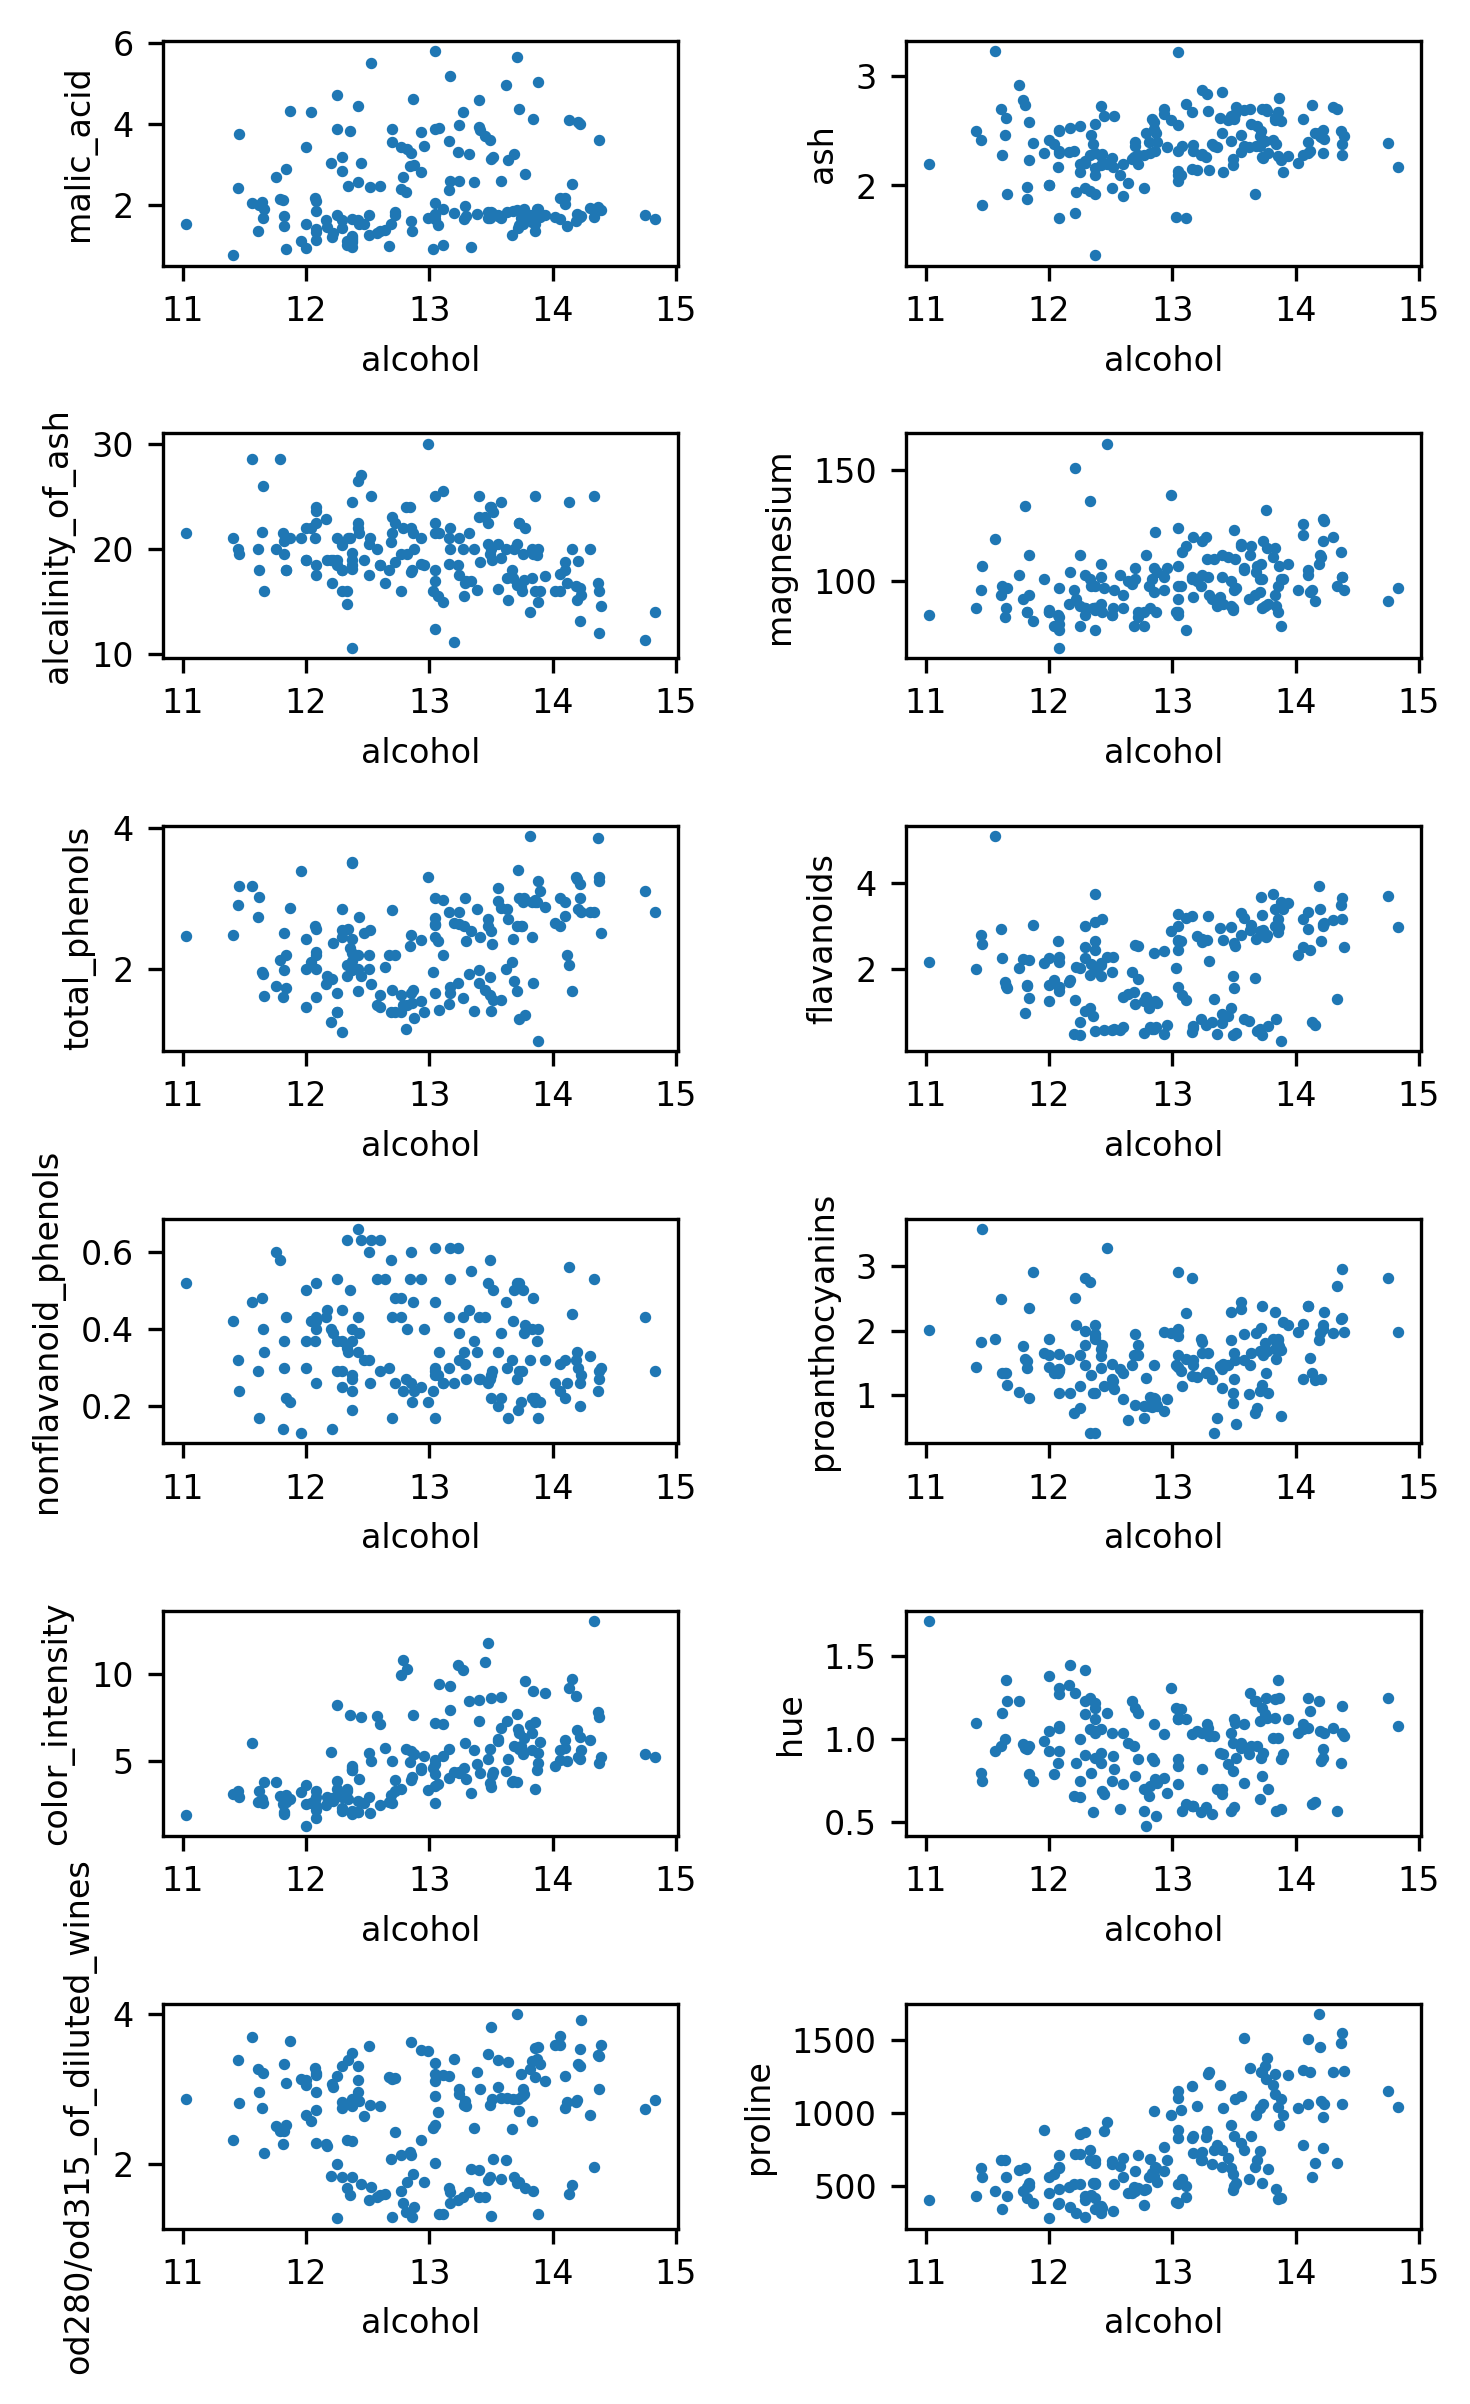

In [6]:
data = wine.frame

nrows, ncols = 6, 2
fig1 = plt.figure(figsize = (5,8), dpi = 300)

for i in range(1, 13):
    ax = fig1.add_subplot(nrows, ncols, i)
    ax.scatter(data.iloc[:,0], data.iloc[:,i],s=3)
    ax.set_xlabel(data.columns[0],fontsize=8)
    ax.set_ylabel(data.columns[i],fontsize=8) 
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
plt.tight_layout()
# plt.rcParams['font.size'] = 8
plt.show()


In [7]:
wine.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Part 1 Build the neural network using MLPClassifier

In [9]:
# Feature matrix in an object named X
X = wine.data
# response vector in a object named y
y = wine.target

print(np.shape(X))
print(np.shape(y))

(178, 13)
(178,)


####  Feature Scaling
* This time I did not scale X_train and x_test separately, I scale the whole data set and split afterwards

In [10]:
# scale the training data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#### Creating training and testing sets

In [11]:
# Split wine data in train and test data (80:20)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

#### MLPClassifier

In [12]:
from sklearn.neural_network import MLPClassifier

# the following code will create a classifier with three layers of 10 nodes each
# max_iter refers to the number of epochs, one epoch is a combination of one cycle of 
# feed-forward and back propagation phase.

model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=4, activation='relu', max_iter=1000)

# now fit the classifier to the training data
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=4)

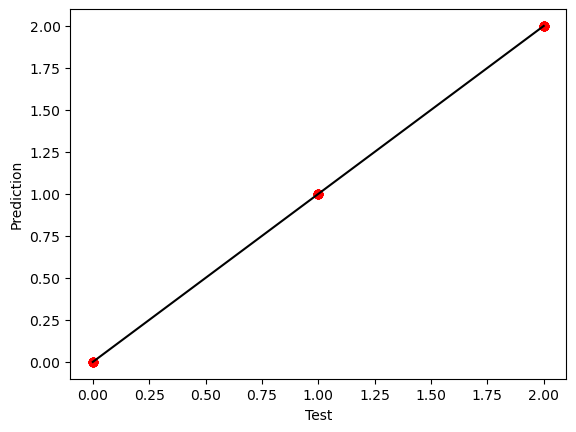

In [13]:
# try making some predictions using your classifier
y_pred = model.predict(X_test)

plt.plot(y_test, y_pred, 'ro')
plt.plot([0, 2], [0, 2],'k')
plt.xlabel('Test')
plt.ylabel('Prediction')
ax.set_xticks(np.arange(0,3,1))
ax.set_xticklabels(["0","1","2"])
plt.show()

In [14]:
# and now test your predictions

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# We will use the confusion matrix to determine the accuracy which is measured as the total 
# number of correct predictions divided by the total number of predictions.

[[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



* The first try already give pretty good prediction with accuracy score of 1

### Part 2 Explore hyperameter space

* Create two 'for' loops to find the best combination of layers and neurons

* For each combination of layers/neurons that yields an accuracy score of 1, calculate the confusion matrix, precision, recall and f1-score for each target class. 

* Describe the implications of your results for model performance for each target class and choose which layers/neurons you will use in the final version of your model.

In [15]:
# now build a loop to test how well different number of hidden layers performs

scores = []
scores_list = []

best_layer_list = []
best_neuron_list = []
best_score_list = []

l_range = range(1, 6, 1)
neurons = [2,3,5,7,10]

score_thred = 1 # since the most results are better than 0.97, I placed a higher threshold than the suggested value 0.9

from sklearn import metrics

for l in l_range:
    for neuron in neurons:
        
        print(l)
        print(neuron)
       # print(f"Combination: {l} layers with {neuron} neurons.") 
        model = MLPClassifier(hidden_layer_sizes=(neuron,)*l, random_state=4, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        scores = metrics.accuracy_score(y_test,y_pred) 
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
        # show the confusion matrix for each combination
        print(confusion_matrix(y_test,y_pred))
        # show the precision, recall, precision, f1-sore, and accuracy score
        print(classification_report(y_test,y_pred,target_names=wine.target_names, zero_division=1))     
                
        if scores == score_thred:
            best_score = scores
            best_score_list.append(scores)
            best_layer = l
            best_layer_list.append(l)
            best_neuron = neuron
            best_neuron_list.append(neuron)
            # print the best combination of layers and neurons
            print(f"Best combination: {l} layers with {neuron} neurons. Accuracy score: {best_score:.3f}")

1
2
[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        10
     class_1       0.93      1.00      0.96        13
     class_2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

1
3
[[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        10
     class_1       1.00      1.00      1.00        13
     class_2       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Best combination: 1 layers with 3 neurons. Accuracy score: 1.000
1
5
[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   supp

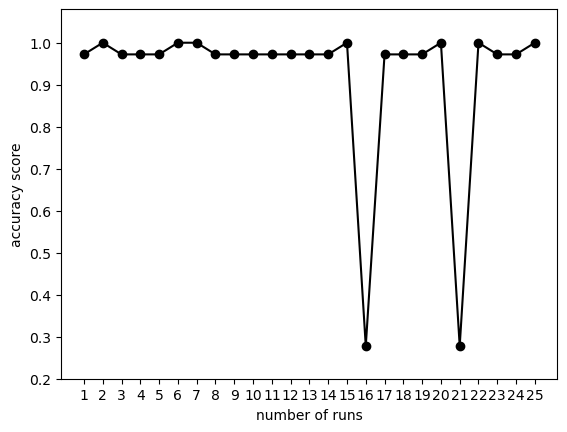

In [16]:
# plot the model accuracy for each combination
plt.plot(np.arange(1,l*len(neurons)+1,1),scores_list,'-o',color='black')
plt.xlabel('number of runs')
# this yield 25 combination runs
plt.xticks(np.arange(1,l*len(neurons)+1,1))
plt.ylabel('accuracy score')
plt.ylim(0.2,1.08)
plt.show()

#### Export the best result as a table

In [17]:
# combine the three arrays into dataframe object
combined_result = np.vstack((best_layer_list, best_neuron_list, best_score_list)).T
Best_combined = pd.DataFrame(combined_result, columns=['layer', 'neuron', 'score'])
print('Best combination is:')
Best_combined

Best combination is:


,layer,neuron,score
0,1.0,3.0,1.0
1,2.0,2.0,1.0
2,2.0,3.0,1.0
3,3.0,10.0,1.0
4,4.0,10.0,1.0
5,5.0,3.0,1.0
6,5.0,10.0,1.0


#### Summary of part 2

* Notice there are a few combinations which all resulted in best model prediction in terms of accuracy score

* Most scores are bouncing between two values (1 or 0.972), even 0.972 is already a good accuracy

* However, there are two combination that particularly unfavored certain class. For example, 4 layers with 2 neurons each and 5 layers with 2 neurons each were particularly "discriminated" wine class 0. Why?

* This is different with what I expected (a hyperbolic line). How to find the "sweet point" then since there are many options?

* In the next section I will see that the more layers and more neurons I chose, the higher probability of each prediction, thought the prediction results are the same


### Part3: Apply the tuned model to unknown wine

In [18]:
# choose one combination
ind = scores_list.index(max(scores_list))
print('The best hidden layer number is:', l_range[ind])
print('The best neurons number is:', neurons[ind])

The best hidden layer number is: 2
The best neurons number is: 3


In [19]:
# Go with a 2 layer model with 5 neurons
mlp = MLPClassifier(hidden_layer_sizes=(neurons[ind],)*l_range[ind], random_state=4, max_iter=10000)

mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=10000, random_state=4)

In [20]:
# load in the csv file, you need to specify the directory of the data file 
infile = '../data/unknown_wine.csv'

# read data using pandas dataframe and specify column separator using ','(default)
new_data = pd.read_csv(infile, sep =',')
new_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.480115,1.577093,1.766757,7.542816,43.456511,0.569810,0.075239,0.267335,0.744527,0.975456,0.741519,2.763938,1228.781864
1,1.074171,1.125832,2.557246,4.421963,57.339151,1.677453,1.027255,0.266734,1.037521,6.093875,0.400008,2.629353,620.263632
2,3.516777,0.819709,0.462774,2.328977,60.776751,0.950360,2.312480,0.114245,1.453748,1.566772,0.249111,0.948954,417.939694
3,13.189798,1.402826,0.153316,7.621558,0.440191,0.103332,2.878385,0.016165,1.558074,5.961709,0.338151,1.608835,233.606714
4,11.973053,1.838887,0.945975,1.269000,83.484182,0.934233,0.448263,0.038872,0.488293,4.358916,0.482324,0.084788,387.198226
5,2.284138,0.048992,0.211198,4.088945,18.957613,1.192519,1.647511,0.005231,1.038589,2.101098,0.237541,1.672787,121.134473
6,9.463899,0.787199,1.863438,16.869074,31.736868,1.470403,0.534720,0.206582,0.633736,4.444610,0.033384,0.925355,328.508942
7,6.453939,1.676532,2.153574,13.765152,70.390073,1.749210,2.721021,0.252128,0.152867,0.582114,0.507068,2.055239,59.729064
8,12.740552,2.854646,0.932969,8.626371,44.557706,0.405552,1.105890,0.219005,0.393723,2.706763,0.983953,1.070769,250.301469
9,9.686586,1.232883,1.475132,3.560106,12.221049,1.229565,1.495698,0.153813,0.886209,1.506817,0.939698,0.921325,187.457035


In [21]:
# apply the new model built above to unknown wine data

classes = {0:'class_0',1:'class_1',2:'class_2'}

# Make a prediction for the unknown data 

data_scaled = scaler.transform(new_data)

data_predict = mlp.predict(data_scaled)

n=len(data_predict)

i_range = range(0,n,1)

wine_class = []

wine_name = []

for i in i_range:
    
    wine_class = classes[data_predict[i]]
    wine_name.append(wine_class)
    print(wine_class)   

class_1
class_1
class_1
class_1
class_1
class_1
class_1
class_1
class_1
class_1


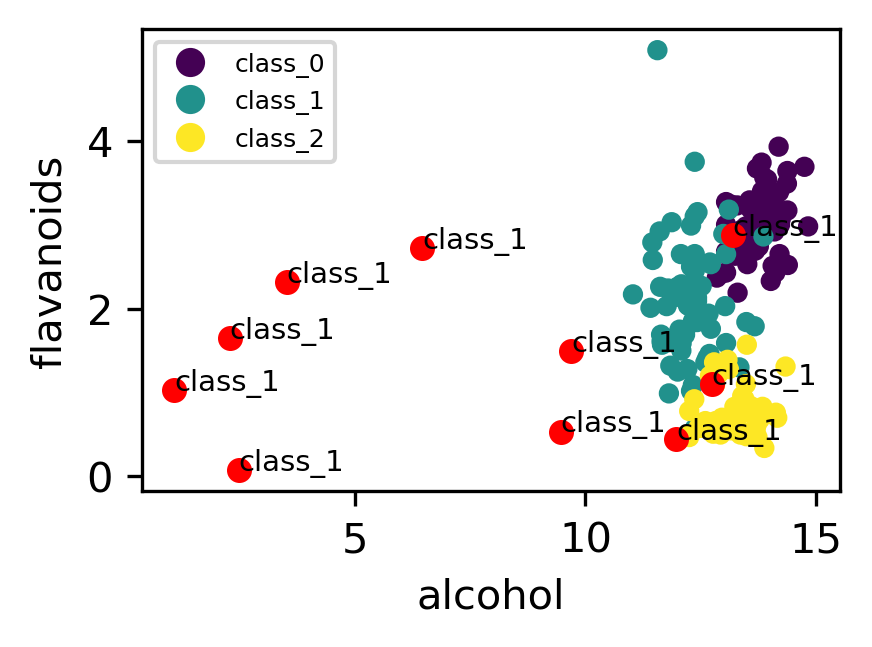

In [22]:
fig2 = plt.figure(figsize = (3,2), dpi = 300)
PltScat=plt.scatter(data.iloc[:,0], data.iloc[:,6],s=15, c = wine.target)
label=wine.target_names
plt.legend(PltScat.legend_elements()[0],label,prop = {'size' : 6})
# plt.colorbar()
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[6])
labels=wine_name
plt.plot(new_data.iloc[:,0], new_data.iloc[:,6], 'or', markersize = 5)
x=new_data.iloc[:,0]
y=new_data.iloc[:,6]
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]),fontsize=7)

### One doubt 


it looks like most of the unknown wines are not close to the major three classes, because they are far away from the clusters.

####  So it might be another totally different class but not included in the original wine data that my model built upon

In [23]:
# predict the probabilities of the unknown data
proba = mlp.predict_proba(data_scaled)

np.set_printoptions(precision=2, suppress=True, formatter={'float': '{:.2f}'.format})
print(proba)


[[0.00 1.00 0.00]
 [0.12 0.78 0.11]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.12 0.78 0.11]
 [0.00 1.00 0.00]
 [0.12 0.78 0.11]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.01 0.99 0.00]]


* Even though 3 neurons with 2 layers also have the same result, I tried 10 neurons with 3 layers in the end
* Because I found it brought a higher probability for the prediction of unknown wine. See below

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(10,)*3, random_state=4, max_iter=10000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000, random_state=4)

In [25]:
# apply the new model built above to unknown wine data

classes = {0:'class_0',1:'class_1',2:'class_2'}
# Scaling data
data_scaled = scaler.transform(new_data)
# Make a prediction for the unknown data
data_predict = mlp.predict(data_scaled)

n=len(data_predict)

i_range = range(0,n,1)

wine_class = []

wine_name = []

for i in i_range:
    
    wine_class = classes[data_predict[i]]
    wine_name.append(wine_class)
    print(wine_class)   

class_1
class_1
class_1
class_1
class_1
class_1
class_1
class_1
class_1
class_1


In [26]:
# 2nd try does increase probability
proba = mlp.predict_proba(data_scaled)
print(proba)

[[0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.01 0.96 0.03]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]]


* I am still not sure if this classification is trusty, though the probability is so high. because some datapoints are so scattered away.
* What if they in fact belong to a 4th class, but now they were classified as class_1 because they were statistically "closer" to this wine class.

### Overlay the unknown wine data on the original wine data

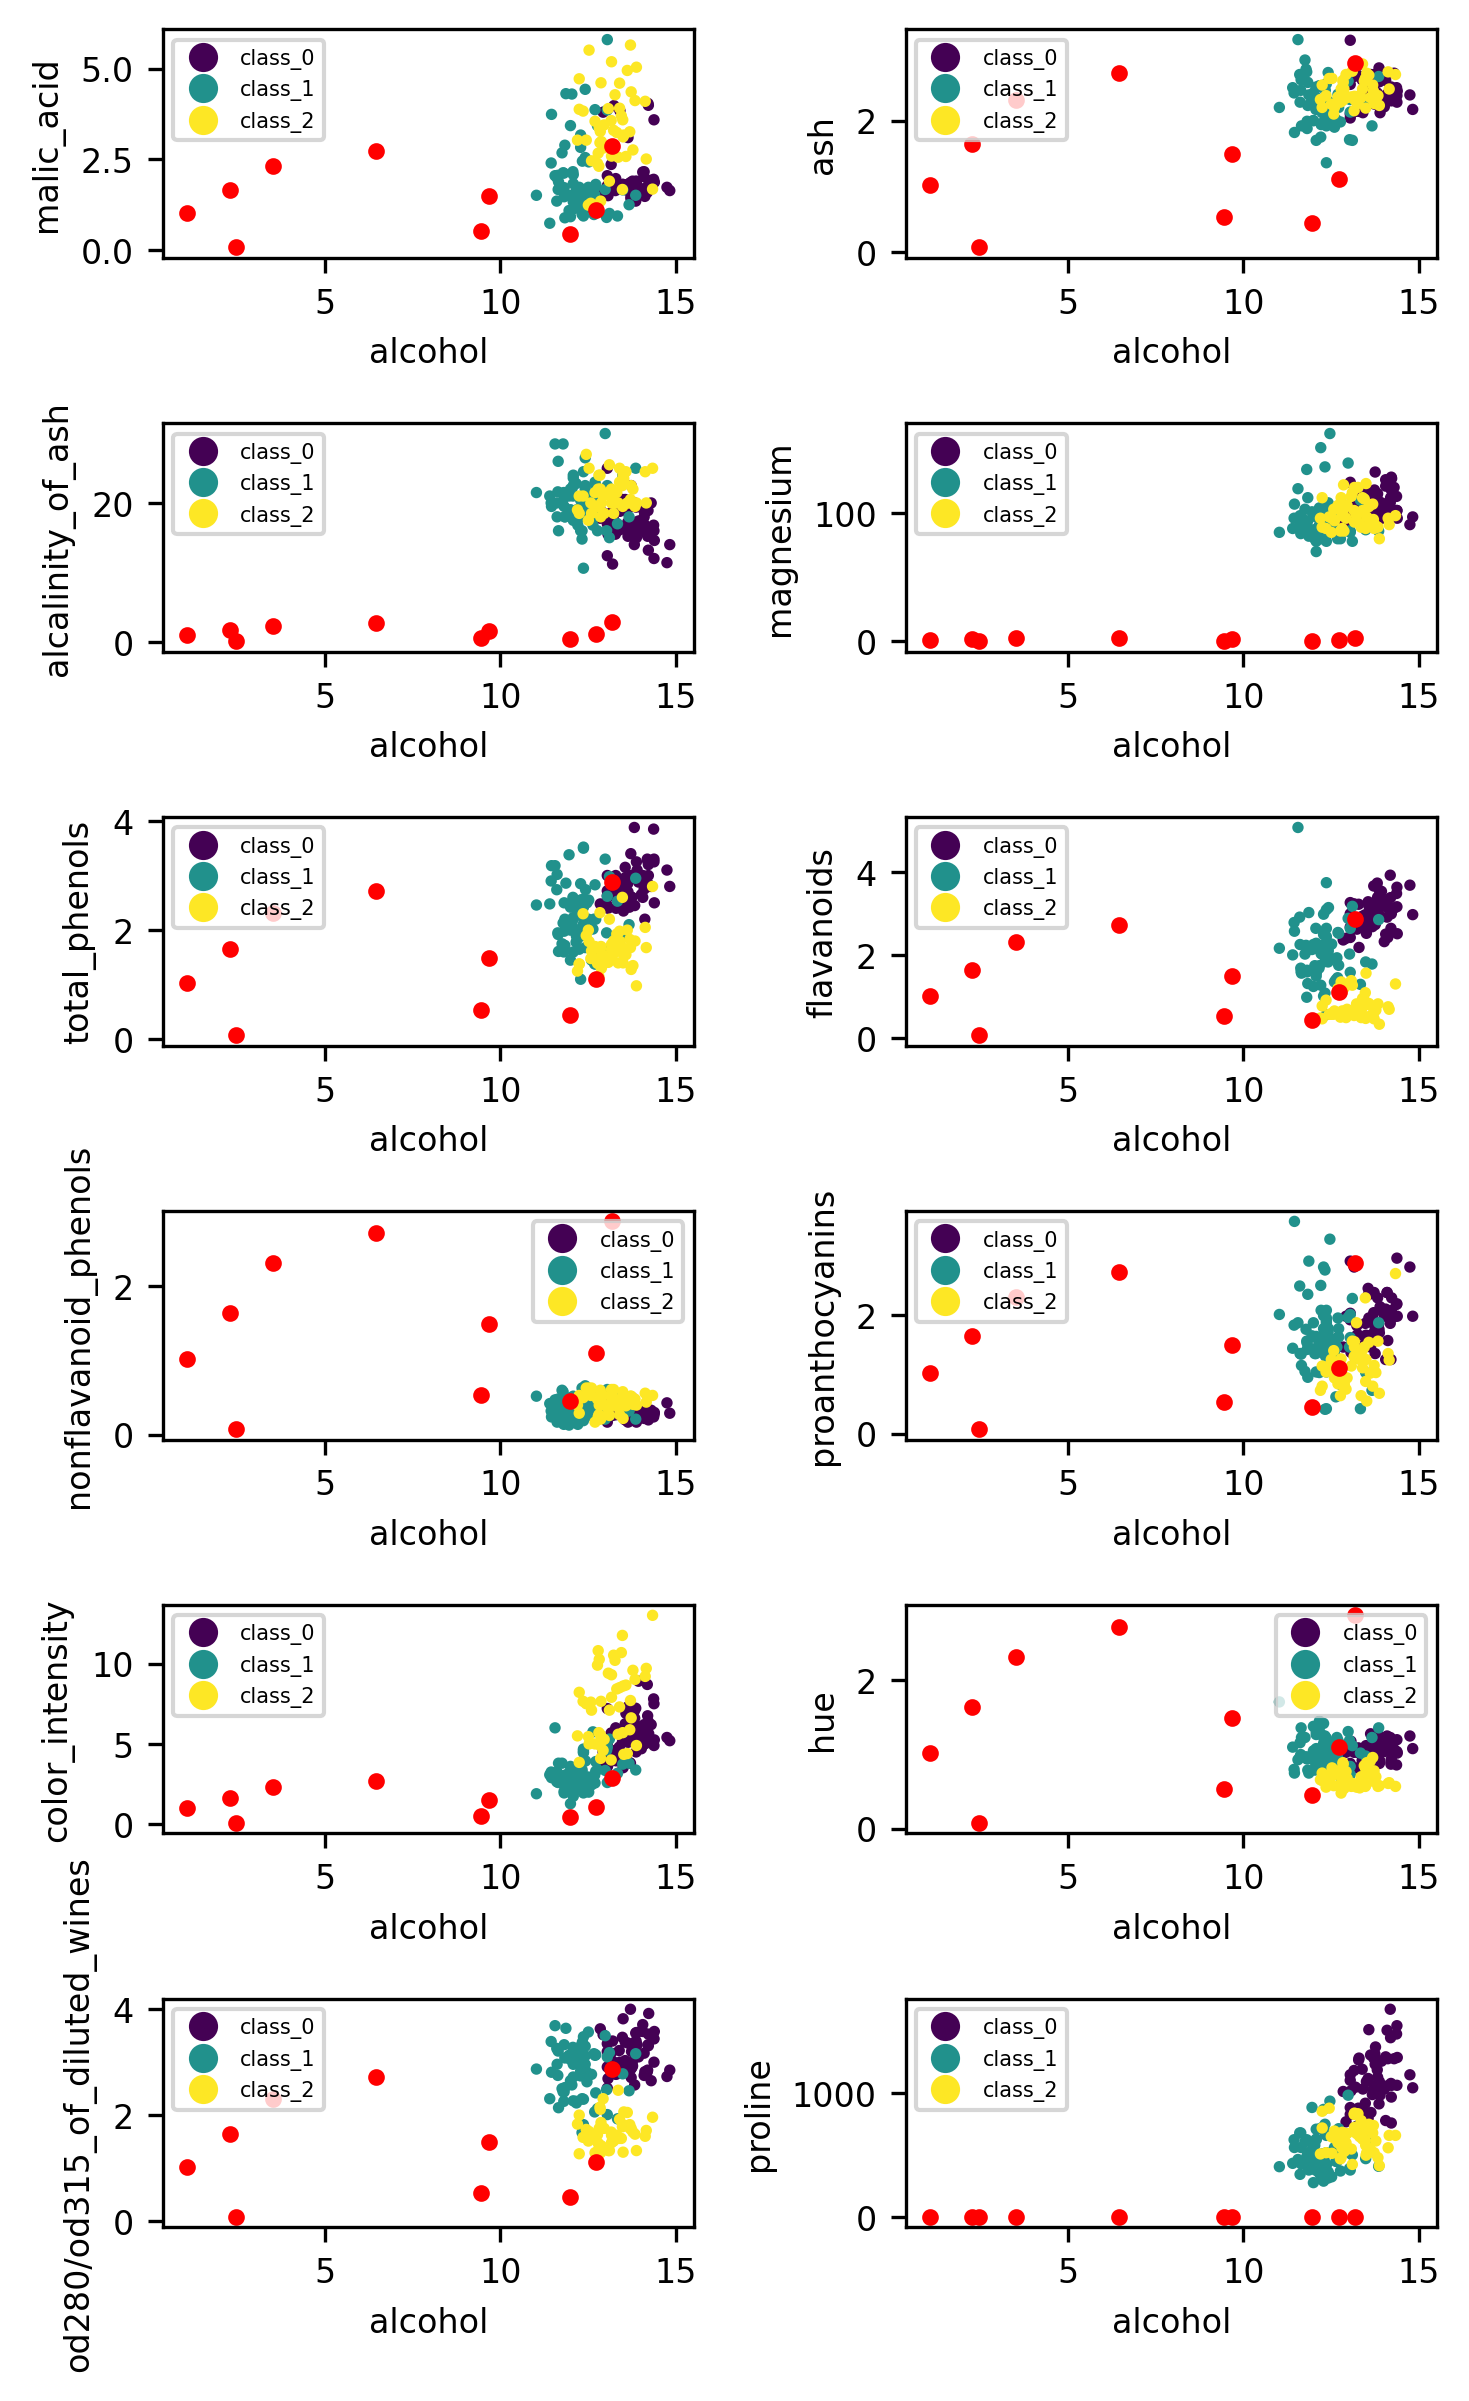

In [27]:
nrows, ncols = 6, 2
fig3 = plt.figure(figsize = (5,8), dpi = 300)
label=wine.target_names

for i in range(1, 13):
    ax = fig3.add_subplot(nrows, ncols, i)
    # ax.scatter(data.iloc[:,0], data.iloc[:,i],s=3,c = wine.target)
    PltScat=plt.scatter(data.iloc[:,0], data.iloc[:,i],s=3, c = wine.target)
    ax.plot(new_data.iloc[:,0], new_data.iloc[:,6], 'or', markersize = 3)
    plt.legend(PltScat.legend_elements()[0],label,prop = {'size' : 5})
    ax.set_xlabel(data.columns[0],fontsize=8)
    ax.set_ylabel(data.columns[i],fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
plt.tight_layout()
# plt.rcParams['font.size'] = 8
plt.show()

#### Conclusion
* I don't think we should apply the tuned model into the unknown wine classification, because some properties were not similar to any of the wine classes. For example, the alcohol content of the unknown wine samples was much less than the known samples. And some property such as magnesium and proline content were 0, however, nonflavanoid_phenols content was way higher than other wines.